In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)


In [3]:
box_office = pd.read_csv('../data/clean_data/box_office_data.csv')
cast_and_crew1 = pd.read_csv('../data/clean_data/cast_and_crew1.csv')
cast_and_crew2 = pd.read_csv('../data/clean_data/cast_and_crew2.csv')
filming_locations = pd.read_csv('../data/clean_data/filming_locations.csv')
genre_sentiment = pd.read_csv('../data/clean_data/genre_sentiment.csv')
movie_level_data_with_sentiment = pd.read_csv('../data/clean_data/movie_level_data_with_sentiment.csv')
movie_level_data = pd.read_csv('../data/clean_data/movie_level_data.csv')

cast_and_crew = pd.concat([cast_and_crew1, cast_and_crew2], ignore_index=True)

In [4]:
box_office.head()

,Title,Year,Worldwide_Box_Office,WBO_Adjusted_for_Inflation
0,Star Wars: Episode IV - A New Hope,1977,307263857.0,5.928476e+09
1,Smokey and the Bandit,1977,126747995.0,2.445528e+09
2,Close Encounters of the Third Kind,1977,116395460.0,2.245782e+09
3,Saturday Night Fever,1977,94213184.0,1.817788e+09
4,A Bridge Too Far,1977,50750000.0,9.791914e+08


In [5]:
movie_level_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,numDirectors,numWriters,actor,actress,archive_footage,archive_sound,casting_director,cinematographer,composer,director,editor,producer,production_designer,self,writer
0,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2880568,1,2,10.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0
1,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2863134,1,4,9.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,4.0
2,tt1375666,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,2543775,1,1,9.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0
3,tt0137523,movie,Fight Club,Fight Club,0,1999,\N,139,Drama,8.8,2316350,1,2,7.0,3.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,0.0,2.0
4,tt0944947,tvSeries,Game of Thrones,Game of Thrones,0,2011,2019,60,"Action,Adventure,Drama",9.2,2276108,20,9,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0


In [6]:
cast_and_crew.head()

,tconst,ordering,nconst,category,job,characters,titleType,numVotes,averageRating,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,tt0000005,1,nm0443482,actor,\N,"[""Blacksmith""]",short,2757,6.2,Charles Kayser,1878,1966,['actor'],\N
1,tt0000005,2,nm0653042,actor,\N,"[""Assistant""]",short,2757,6.2,John Ott,1850,1931,['actor'],\N
2,tt0000005,3,nm0249379,producer,producer,\N,short,2757,6.2,Thomas A. Edison,1847,1931,"['producer', 'director', 'miscellaneous']","tt0361066,tt0242312,tt0004457,tt0001223"
3,tt0001223,7,nm0249379,producer,producer,\N,short,4716,6.4,Thomas A. Edison,1847,1931,"['producer', 'director', 'miscellaneous']","tt0361066,tt0242312,tt0004457,tt0001223"
4,tt0000010,1,nm0525910,director,\N,\N,short,7530,6.8,Louis Lumière,1864,1948,"['producer', 'director', 'cinematographer']","tt6231346,tt1167665,tt0000014,tt2461054"


In [7]:
filming_locations.head()

,tconst,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,location_9,location_10,location_11,location_12,location_13,location_14,location_15,location_16,location_17,location_18,location_19,location_20,location_21,location_22,location_23,location_24,location_25,location_26,location_27,location_28,location_29,location_30,location_31,location_32,location_33,location_34,location_35,location_36,location_37,location_38,location_39,location_40,location_41,location_42,location_43,location_44,location_45,location_46,location_47,location_48,location_49,location_50,location_51,location_52,location_53,location_54,location_55,location_56,location_57,location_58,location_59,location_60,location_61,location_62,location_63,location_64,location_65,location_66,location_67,location_68,location_69,location_70,location_71,location_72,location_73,location_74,location_75,location_76,location_77,location_78,location_79,location_80,location_81,location_82,location_83,location_84,location_85,location_86,location_87,location_88,location_89,location_90,location_91,location_92,location_93,location_94,location_95,location_96,location_97,location_98,location_99,location_100,location_101,location_102,location_103,location_104,location_105,location_106,location_107,location_108,location_109,location_110,location_111,location_112,location_113,location_114,location_115,location_116,location_117,location_118,location_119,location_120,location_121,location_122,location_123,location_124,location_125,location_126,location_127,location_128,location_129,location_130,location_131,location_132,location_133,location_134,location_135,location_136,location_137,location_138,location_139,location_140,location_141,location_142,location_143,location_144,location_145,location_146,location_147,location_148,location_149,location_150,location_151,location_152,location_153,location_154,location_155,location_156,location_157
0,tt0111161,"Mansfield Reformatory - 100 Reformatory Road, ...","Butler, Ohio, USA","Sandy Point, St. Croix, U.S. Virgin Islands","Malabar Farm State Park - 4050 Bromfield Road,...","127A Smithfield Road, Frederiksted, Virgin Isl...","Wyandot County Courthouse, Upper Sandusky, Ohi...","Ashland, Ohio, USA","193 North Main Street, Mansfield, Ohio, USA","Snyder Road and Hagerman Road, Bellville, Ohio...","Mansfield, Ohio, USA","Upper Sandusky, Ohio, USA","301 E 5th Street, Mansfield, Ohio, USA","Rod Bay, St Croix, USVI","Yuma, Arizona, USA","Bellville, Ohio, USA","Sandusky, Ohio, USA","Mansfield, Shelby, Ohio, USA","Ohio, USA","Arizona, USA",USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0468569,"Chicago, Illinois, USA","Battersea Power Station, Battersea, London, En...","Times Square, Causeway Bay, Hong Kong","Senate House, University College London, Malet...","Piccadilly Circus, Piccadilly, London, England...","Queen's Road Central, Central, Hong Kong, China","Millennium Station, Chicago, Illinois, USA",Twin Anchors Restaurant & Tavern - 1655 N. Sed...,"Hong Kong, China","Pinewood Studios, Iver Heath, Buckinghamshire,...","Victoria Harbour, Hong Kong, China","Brach's Candy Factory - 401 N. Cicero Street, ...","Bedford, Bedfordshire, England, UK","Lower Wacker Drive, Downtown, Chicago, Illinoi...","Chertsey, Surrey, England, UK",George Farmiloe Building - 28-36 St John Stree...,"South LaSalle St., Chicago, Illinois, USA","Old Post Office, Chicago, Illinois, USA","University of Westminster, London, England, UK","Atwood Cafe - 1

In [8]:
genre_sentiment.head()

,Category,Values
0,Biography,0.038096
1,Biography,-0.027905
2,Biography,0.044076
3,Biography,0.036501
4,Biography,0.094158


In [9]:
movie_level_data_with_sentiment.head()

,File Name,Content,script_len,polarity,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,numDirectors,numWriters,actor,actress,archive_footage,archive_sound,casting_director,cinematographer,composer,director,editor,producer,production_designer,self,writer
0,Gamer,\r\n\r\n\r\n GAME...,230180,0.004451,1952,tt1034032,movie,Gamer,Gamer,0,2009,\N,95,"Action,Sci-Fi,Thriller",5.7,139478,2,2,7.0,3.0,0.0,0.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,0.0,2.0
1,No Country for Old Men,\r\n\r\n\r\n \r\n NO ...,189510,0.013795,71,tt0477348,movie,No Country for Old Men,No Country for Old Men,0,2007,\N,122,"Crime,Drama,Thriller",8.2,1057070,2,3,8.0,2.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,0.0,3.0
2,Bad Country,\r\n\r\n \r\n ...,217197,-0.019347,15659,tt2350892,movie,Bad Country,Bad Country,0,2014,\N,95,"Action,Crime,Drama",5.8,9320,1,4,9.0,1.0,0.0,0.0,2.0,1.0,2.0,1.0,2.0,4.0,1.0,0.0,4.0
3,17 Again,\r\n \r\n \r\n ...,200101,0.062805,1196,tt0974661,movie,17 Again,17 Again,0,2009,\N,102,"Comedy,Drama,Fantasy",6.4,215937,1,1,7.0,3.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0
4,Color of Night,\r\n\r\n\r\n ...,255873,0.121270,7789,tt0109456,movie,Color of Night,Color of Night,0,1994,\N,121,"Drama,Mystery,Romance",5.2,25709,1,2,8.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0


In [10]:
movie_level_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,numDirectors,numWriters,actor,actress,archive_footage,archive_sound,casting_director,cinematographer,composer,director,editor,producer,production_designer,self,writer
0,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2880568,1,2,10.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0
1,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2863134,1,4,9.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,4.0
2,tt1375666,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,2543775,1,1,9.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0
3,tt0137523,movie,Fight Club,Fight Club,0,1999,\N,139,Drama,8.8,2316350,1,2,7.0,3.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,0.0,2.0
4,tt0944947,tvSeries,Game of Thrones,Game of Thrones,0,2011,2019,60,"Action,Adventure,Drama",9.2,2276108,20,9,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0


In [11]:
inter = np.intersect1d(movie_level_data['primaryTitle'] + movie_level_data['startYear'].astype('string'),box_office['Title']+box_office['Year'].astype('string'))

temp = box_office[(box_office['Title'] + box_office['Year'].astype('string')).isin(inter)]
box_movie = temp[temp.duplicated(['Title','Year'])==False]

temp = movie_level_data[(movie_level_data['primaryTitle'] + movie_level_data['startYear'].astype('string')).isin(inter)]
movie_box = temp[temp.duplicated(['primaryTitle','startYear'])==False]

In [12]:
df_merged = pd.merge(movie_box, box_movie, left_on=['primaryTitle', 'startYear'], right_on=['Title','Year'],  how='inner')
df_merged['tot_act'] = df_merged['actor']+df_merged['actress']

# Calculate Q1 and Q3
Q1 = df_merged['WBO_Adjusted_for_Inflation'].quantile(0.25)
Q3 = df_merged['WBO_Adjusted_for_Inflation'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = df_merged[(df_merged['WBO_Adjusted_for_Inflation'] >= lower_bound) & (df_merged['WBO_Adjusted_for_Inflation'] <= upper_bound)]


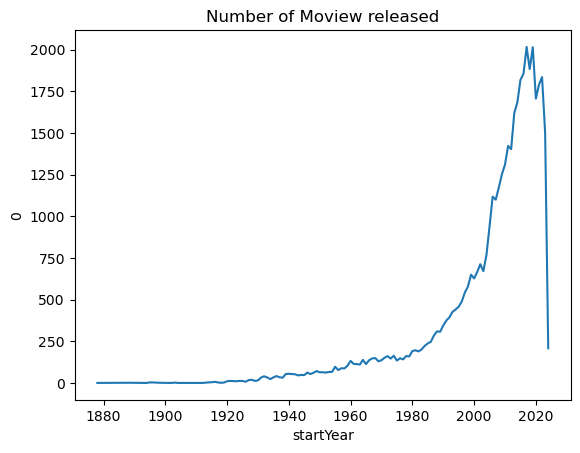

In [13]:
sns.lineplot(x = 'startYear', y = 0,data = movie_level_data.groupby(['startYear']).size().reset_index())
plt.title('Number of Moview released')
plt.show()

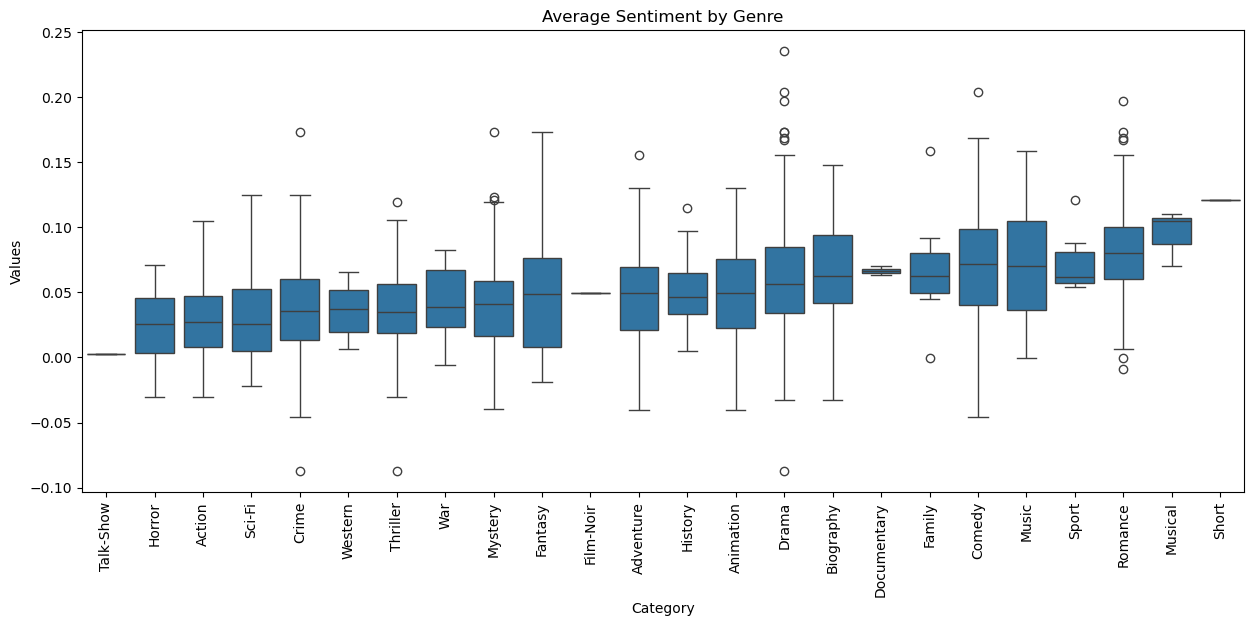

In [14]:
# Calculate mean values for each category
mean_values = genre_sentiment.groupby('Category')['Values'].mean().reset_index()

# Sort the categories based on their mean values
sorted_categories = mean_values.sort_values('Values')['Category']

# Plot the boxplot with seaborn, ordering the categories by their mean values
plt.figure(figsize=(15, 6))  # Set figure size
sns.boxplot(x='Category', y='Values', data=genre_sentiment, order=sorted_categories)
plt.xticks(rotation=90)
plt.title('Average Sentiment by Genre')
plt.show()

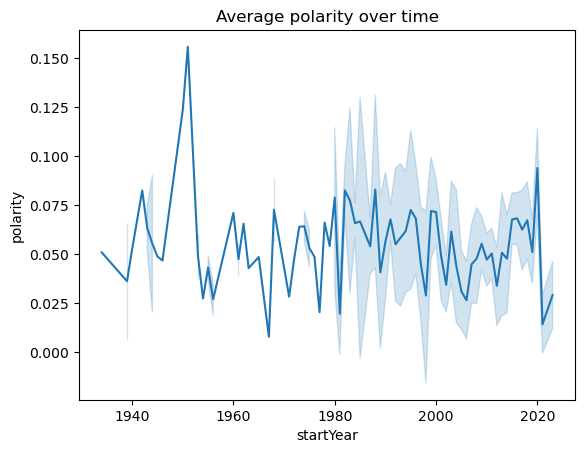

In [15]:
sns.lineplot(x = 'startYear', y = 'polarity', estimator=np.mean, data = movie_level_data_with_sentiment)
plt.title('Average polarity over time')
plt.show()

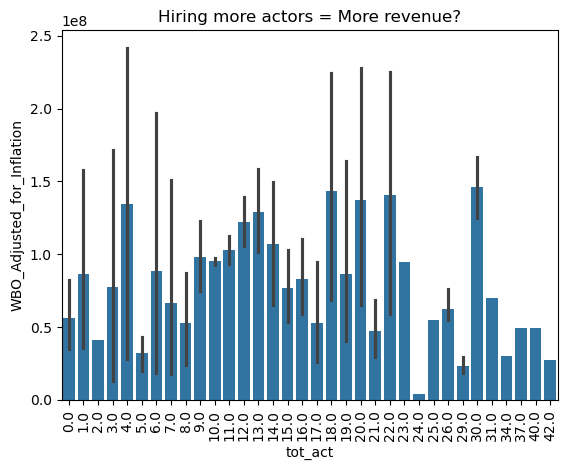

In [16]:
sns.barplot(x='tot_act',y='WBO_Adjusted_for_Inflation',data=filtered_df, estimator = np.mean)
plt.xticks(rotation=90)
plt.title('Hiring more actors = More revenue?')
plt.show()

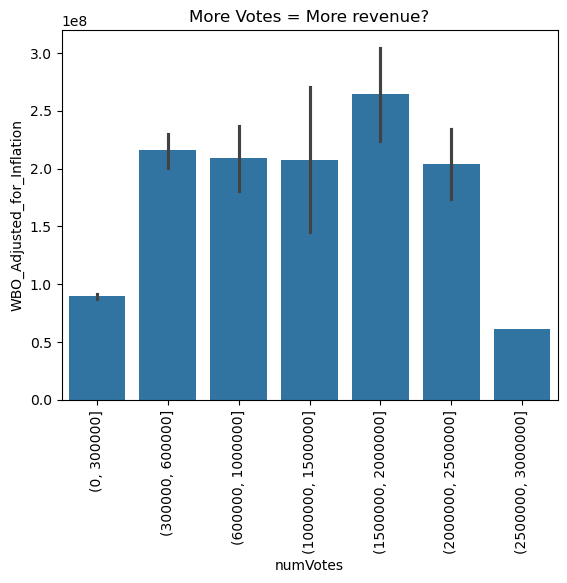

In [17]:
bins = [0,300000,600000,1000000,1500000,2000000,2500000,3000000]

sns.barplot(x=pd.cut(filtered_df['numVotes'], bins=bins, right=True),y=filtered_df['WBO_Adjusted_for_Inflation'], estimator = np.mean)
plt.xticks(rotation=90)
plt.title('More Votes = More revenue?')
plt.show()

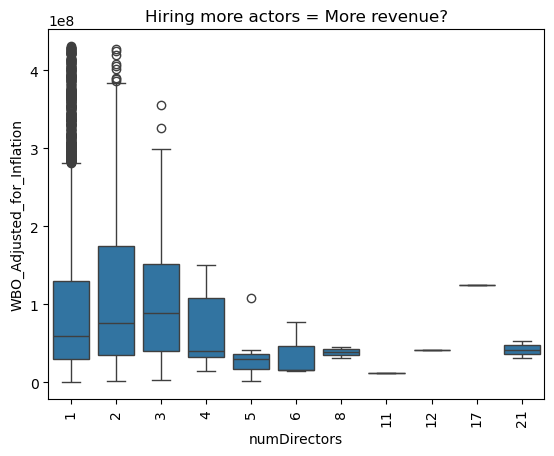

In [18]:
sns.boxplot(x='numDirectors',y='WBO_Adjusted_for_Inflation',data=filtered_df)
plt.xticks(rotation=90)
plt.title('Hiring more actors = More revenue?')
plt.show()

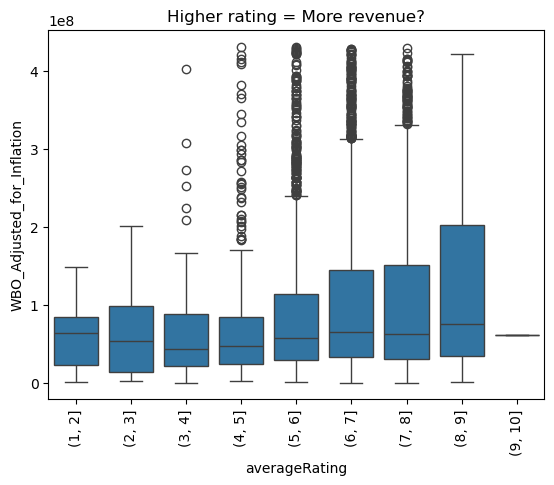

In [19]:
bins = [1,2,3,4,5,6,7,8,9,10]

sns.boxplot(x=pd.cut(filtered_df['averageRating'], bins=bins, right=True),y=filtered_df['WBO_Adjusted_for_Inflation'])
plt.xticks(rotation=90)
plt.title('Higher rating = More revenue?')
plt.show()

C:\Users\JaeHoBahng\AppData\Local\Temp\ipykernel_24176\1497941752.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_revenue = pd.concat([df_revenue, temp_df], ignore_index=True)
C:\Users\JaeHoBahng\AppData\Local\Temp\ipykernel_24176\1497941752.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Year', y = 'Values', hue = 'Category',data = df_revenue[df_revenue['Category'].isin(top_5)], estimator=np.mean, ci=None)


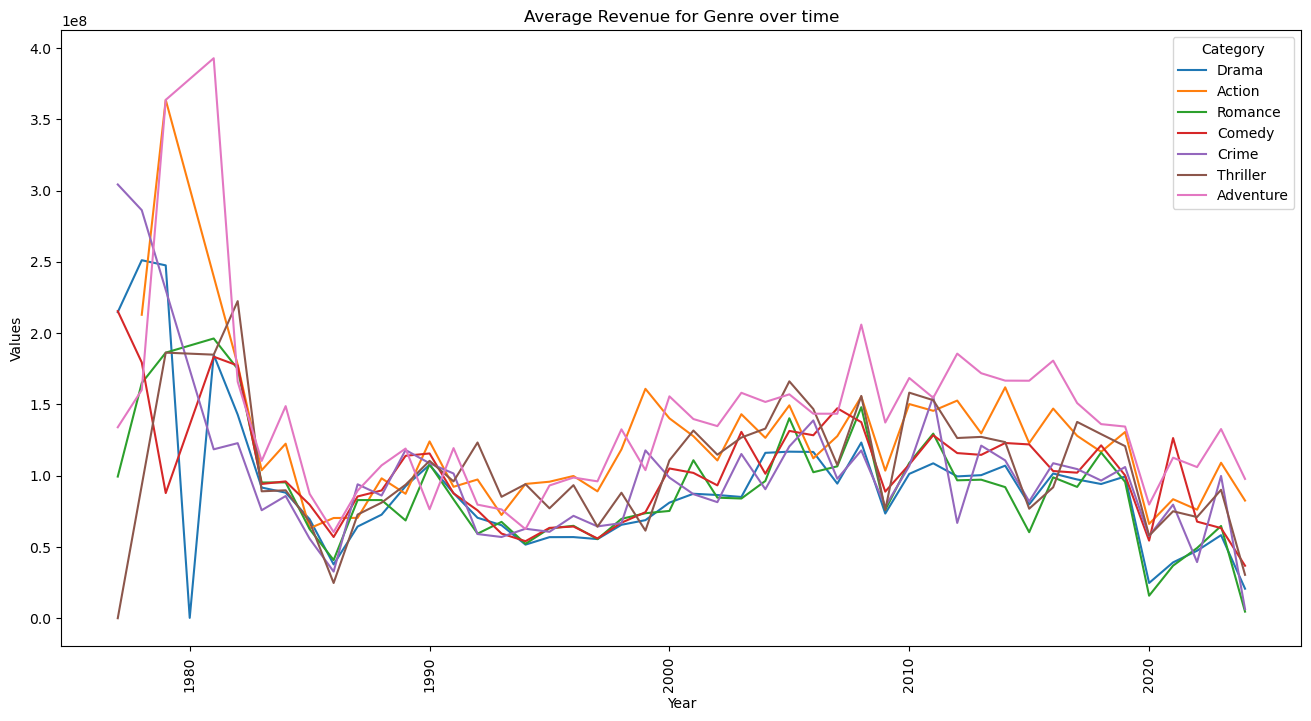

In [20]:
# Suppose we want to loop through these names and create a list for each
genres = set(sum(filtered_df['genres'].str.split(',').tolist(), []))

# Initialize an empty dictionary
lists_dict = {}
year_dict = {}

# Loop through the names and create an empty list for each, stored in the dictionary
for name in genres:
    lists_dict[name] = filtered_df[filtered_df['genres'].str.contains(name)]['WBO_Adjusted_for_Inflation'].tolist()
    year_dict[name] = filtered_df[filtered_df['genres'].str.contains(name)]['startYear'].tolist()

# Initialize an empty DataFrame
df_revenue = pd.DataFrame(columns=['Category', 'Values'])

# Populate the DataFrame
for key, values in lists_dict.items():
    temp_df = pd.DataFrame({'Category': key, 'Values': values})
    df_revenue = pd.concat([df_revenue, temp_df], ignore_index=True)

year = [value for sublist in year_dict.values() for value in sublist]

df_revenue['Year'] = year
top_5 = df_revenue.groupby('Category')['Values'].sum().reset_index().sort_values('Values', ascending=False).head(7)['Category']

plt.figure(figsize=(16,8))
sns.lineplot(x = 'Year', y = 'Values', hue = 'Category',data = df_revenue[df_revenue['Category'].isin(top_5)], estimator=np.mean, ci=None)
plt.xticks(rotation = 90)
plt.title('Average Revenue for Genre over time')
plt.show()

C:\Users\JaeHoBahng\AppData\Local\Temp\ipykernel_24176\565917669.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Year', y = 'Values', hue = 'Category',data = df_revenue[df_revenue['Category'].isin(top_5)], estimator=np.sum, ci=None)


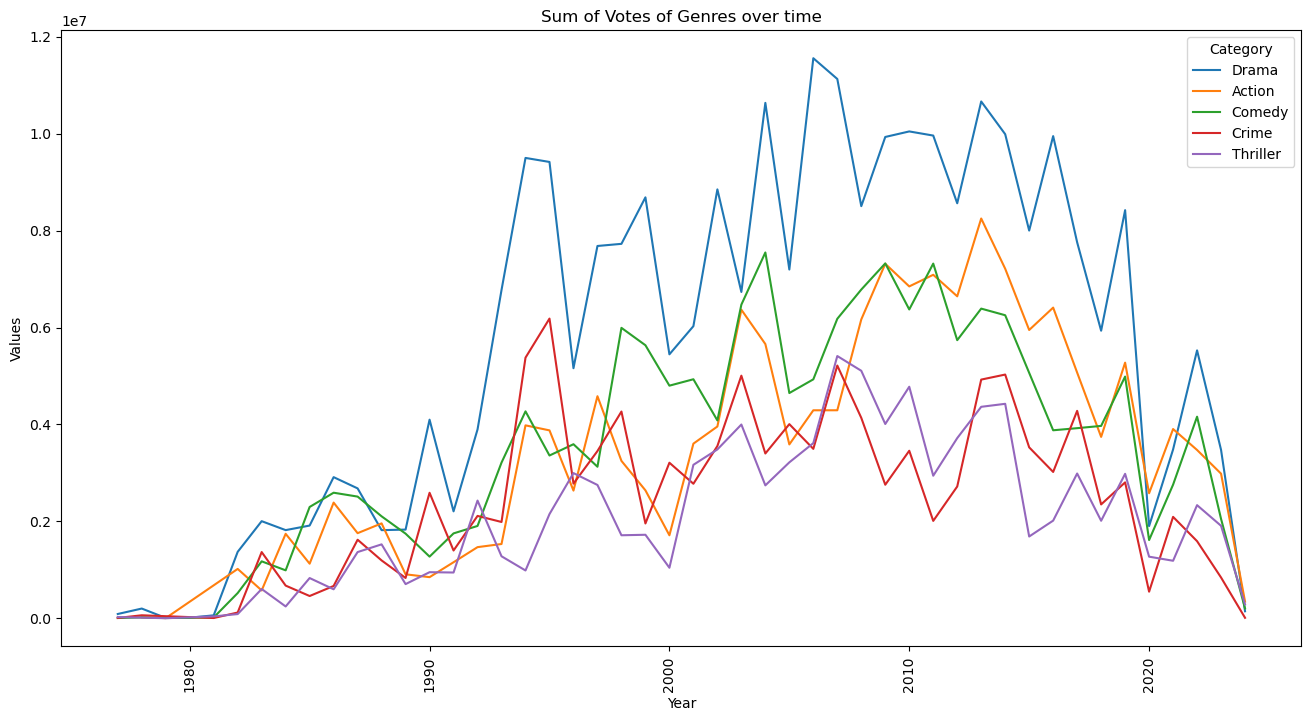

In [21]:
# Suppose we want to loop through these names and create a list for each
genres = set(sum(filtered_df['genres'].str.split(',').tolist(), []))

# Initialize an empty dictionary
lists_dict = {}
year_dict = {}

# Loop through the names and create an empty list for each, stored in the dictionary
for name in genres:
    lists_dict[name] = filtered_df[filtered_df['genres'].str.contains(name)]['numVotes'].tolist()
    year_dict[name] = filtered_df[filtered_df['genres'].str.contains(name)]['Year'].tolist()

# Initialize an empty DataFrame
df_revenue = pd.DataFrame(columns=['Category', 'Values'])

# Populate the DataFrame
for key, values in lists_dict.items():
    temp_df = pd.DataFrame({'Category': key, 'Values': values})
    df_revenue = pd.concat([df_revenue, temp_df], ignore_index=True)

year = [value for sublist in year_dict.values() for value in sublist]

df_revenue['Year'] = year
top_5 = df_revenue.groupby('Category')['Values'].sum().reset_index().sort_values('Values', ascending=False).head(5)['Category']

plt.figure(figsize=(16,8))
sns.lineplot(x = 'Year', y = 'Values', hue = 'Category',data = df_revenue[df_revenue['Category'].isin(top_5)], estimator=np.sum, ci=None)
plt.xticks(rotation = 90)
plt.title('Sum of Votes of Genres over time')
plt.show()

C:\Users\JaeHoBahng\AppData\Local\Temp\ipykernel_24176\1173689006.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_revenue = pd.concat([df_revenue, temp_df], ignore_index=True)
C:\Users\JaeHoBahng\AppData\Local\Temp\ipykernel_24176\1173689006.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'Year', y = 'Values', hue = 'Category',data = df_revenue[df_revenue['Category'].isin(top_5)], estimator=np.mean, ci=None)


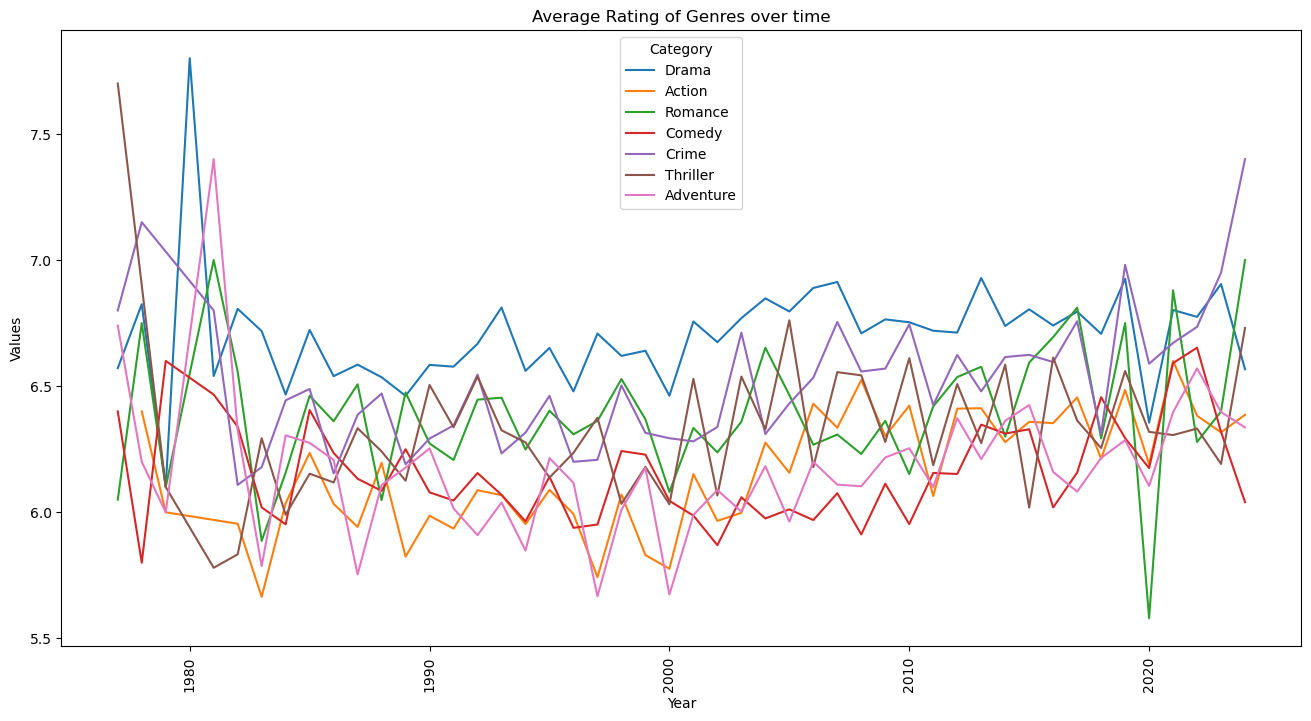

In [22]:
# Suppose we want to loop through these names and create a list for each
genres = set(sum(filtered_df['genres'].str.split(',').tolist(), []))

# Initialize an empty dictionary
lists_dict = {}
year_dict = {}

# Loop through the names and create an empty list for each, stored in the dictionary
for name in genres:
    lists_dict[name] = filtered_df[filtered_df['genres'].str.contains(name)]['averageRating'].tolist()
    year_dict[name] = filtered_df[filtered_df['genres'].str.contains(name)]['Year'].tolist()

# Initialize an empty DataFrame
df_revenue = pd.DataFrame(columns=['Category', 'Values'])

# Populate the DataFrame
for key, values in lists_dict.items():
    temp_df = pd.DataFrame({'Category': key, 'Values': values})
    df_revenue = pd.concat([df_revenue, temp_df], ignore_index=True)

year = [value for sublist in year_dict.values() for value in sublist]

df_revenue['Year'] = year
top_5 = df_revenue.groupby('Category')['Values'].sum().reset_index().sort_values('Values', ascending=False).head(7)['Category']

plt.figure(figsize=(16,8))
sns.lineplot(x = 'Year', y = 'Values', hue = 'Category',data = df_revenue[df_revenue['Category'].isin(top_5)], estimator=np.mean, ci=None)
plt.xticks(rotation = 90)
plt.title('Average Rating of Genres over time')
plt.show()

C:\Users\JaeHoBahng\AppData\Local\Temp\ipykernel_24176\1908949708.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'startYear', y = 'tot_act', data = filtered_df, estimator=np.mean, ci=None)


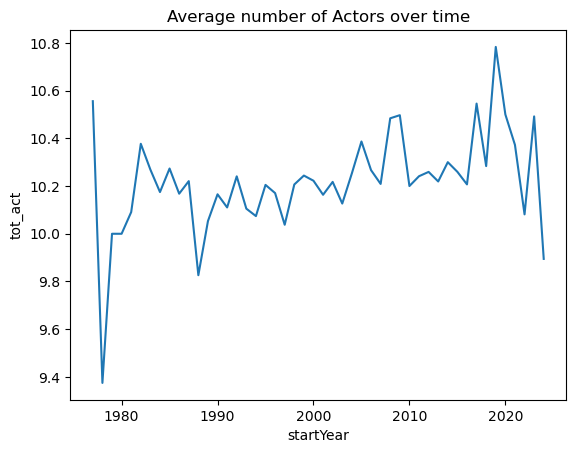

In [23]:
sns.lineplot(x = 'startYear', y = 'tot_act', data = filtered_df, estimator=np.mean, ci=None)
plt.title('Average number of Actors over time')
plt.show()

C:\Users\JaeHoBahng\AppData\Local\Temp\ipykernel_24176\592464608.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_long = pd.concat([df_long, temp_df], ignore_index=True)


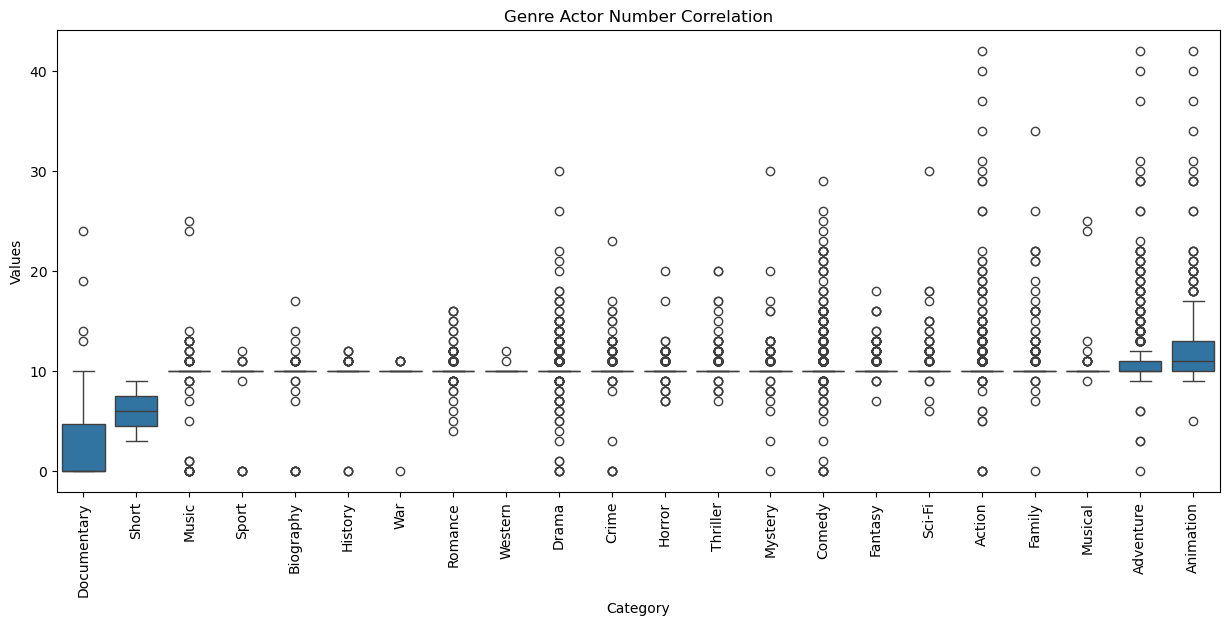

In [24]:
# Suppose we want to loop through these names and create a list for each
genres = set(sum(filtered_df['genres'].str.split(',').tolist(), []))

# Initialize an empty dictionary
lists_dict = {}

# Loop through the names and create an empty list for each, stored in the dictionary
for name in genres:
    lists_dict[name] = filtered_df[filtered_df['genres'].str.contains(name)]['tot_act'].tolist()

# Initialize an empty DataFrame
df_long = pd.DataFrame(columns=['Category', 'Values'])

# Populate the DataFrame
for key, values in lists_dict.items():
    temp_df = pd.DataFrame({'Category': key, 'Values': values})
    df_long = pd.concat([df_long, temp_df], ignore_index=True)

    # Calculate mean values for each category
mean_values = df_long.groupby('Category')['Values'].mean().reset_index()

# Sort the categories based on their mean values
sorted_categories = mean_values.sort_values('Values')['Category']

# Plot the boxplot with seaborn, ordering the categories by their mean values
plt.figure(figsize=(15, 6))  # Set figure size
sns.boxplot(x='Category', y='Values', data=df_long, order=sorted_categories)
plt.xticks(rotation=90)
plt.title('Genre Actor Number Correlation')
plt.show()

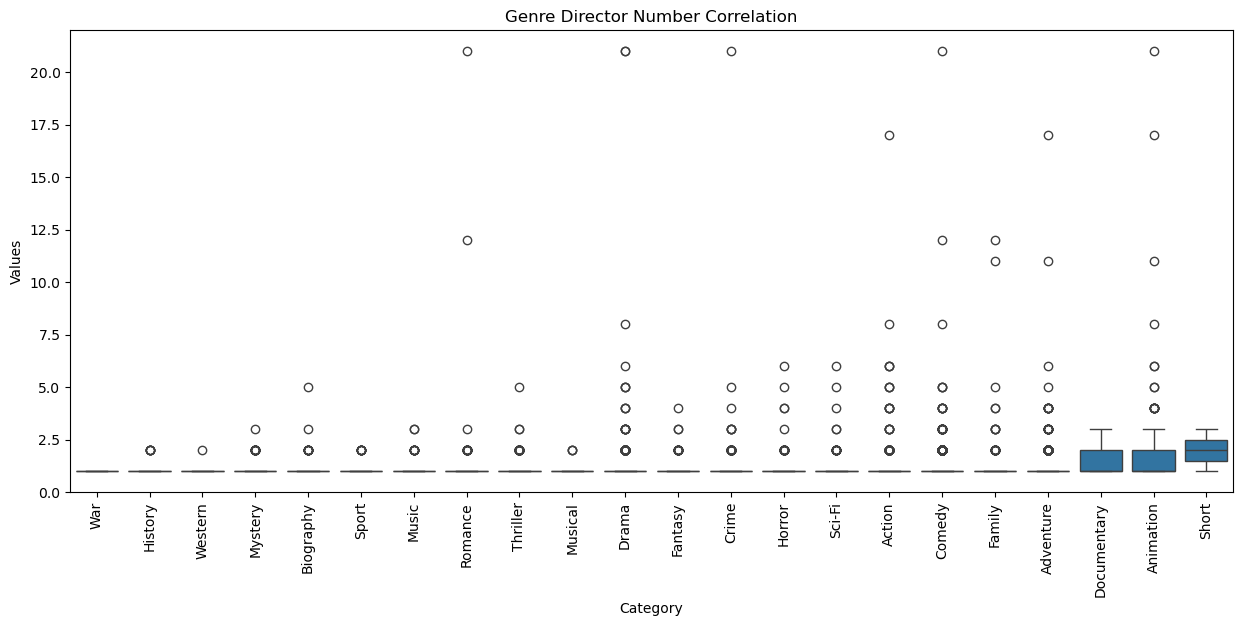

In [25]:
# Suppose we want to loop through these names and create a list for each
genres = set(sum(filtered_df['genres'].str.split(',').tolist(), []))

# Initialize an empty dictionary
lists_dict = {}

# Loop through the names and create an empty list for each, stored in the dictionary
for name in genres:
    lists_dict[name] = filtered_df[filtered_df['genres'].str.contains(name)]['numDirectors'].tolist()

# Initialize an empty DataFrame
df_long = pd.DataFrame(columns=['Category', 'Values'])

# Populate the DataFrame
for key, values in lists_dict.items():
    temp_df = pd.DataFrame({'Category': key, 'Values': values})
    df_long = pd.concat([df_long, temp_df], ignore_index=True)

    # Calculate mean values for each category
mean_values = df_long.groupby('Category')['Values'].mean().reset_index()

# Sort the categories based on their mean values
sorted_categories = mean_values.sort_values('Values')['Category']

# Plot the boxplot with seaborn, ordering the categories by their mean values
plt.figure(figsize=(15, 6))  # Set figure size
sns.boxplot(x='Category', y='Values', data=df_long, order=sorted_categories)
plt.xticks(rotation=90)
plt.title('Genre Director Number Correlation')
plt.show()

C:\Users\JaeHoBahng\AppData\Local\Temp\ipykernel_24176\1073588826.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_long = pd.concat([df_long, temp_df], ignore_index=True)


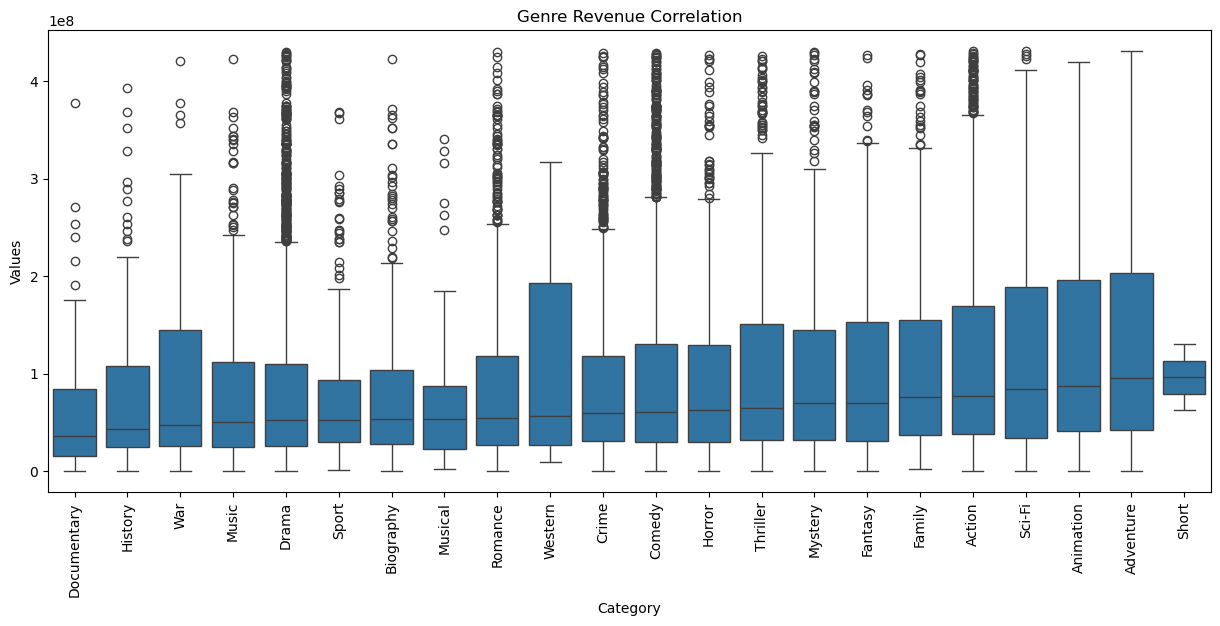

In [26]:
# Suppose we want to loop through these names and create a list for each
genres = set(sum(filtered_df['genres'].str.split(',').tolist(), []))

# Initialize an empty dictionary
lists_dict = {}

# Loop through the names and create an empty list for each, stored in the dictionary
for name in genres:
    lists_dict[name] = filtered_df[filtered_df['genres'].str.contains(name)]['WBO_Adjusted_for_Inflation'].tolist()

# Initialize an empty DataFrame
df_long = pd.DataFrame(columns=['Category', 'Values'])

# Populate the DataFrame
for key, values in lists_dict.items():
    temp_df = pd.DataFrame({'Category': key, 'Values': values})
    df_long = pd.concat([df_long, temp_df], ignore_index=True)

    # Calculate mean values for each category
mean_values = df_long.groupby('Category')['Values'].median().reset_index()

# Sort the categories based on their mean values
sorted_categories = mean_values.sort_values('Values')['Category']

# Plot the boxplot with seaborn, ordering the categories by their mean values
plt.figure(figsize=(15, 6))  # Set figure size
sns.boxplot(x='Category', y='Values', data=df_long, order=sorted_categories)
plt.xticks(rotation=90)
plt.title('Genre Revenue Correlation')
plt.show()

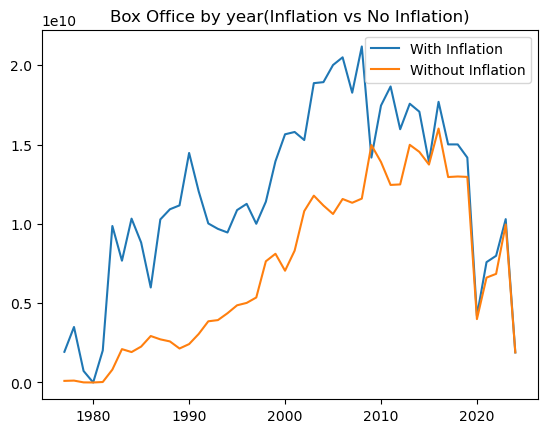

In [27]:
plt.plot(filtered_df.groupby(['Year'])['WBO_Adjusted_for_Inflation'].sum(), label = 'With Inflation')
plt.plot(filtered_df.groupby(['Year'])['Worldwide_Box_Office'].sum(), label = 'Without Inflation')
plt.title('Box Office by year(Inflation vs No Inflation)')
plt.legend()
plt.show()

In [28]:
actor = cast_and_crew[cast_and_crew['category']=='actor']
actor = actor[actor['birthYear']!='\\N']
actor['birthYear'] = actor['birthYear'].astype('int')
average_birth_year = actor.groupby(['tconst'])['birthYear'].mean().reset_index()
crew_box_movie = pd.merge(filtered_df,average_birth_year,on='tconst', how='inner')
crew_box_movie['act_avg_age'] = (crew_box_movie['startYear'] - crew_box_movie['birthYear']).round(0)

In [29]:
crew_box_movie.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,numDirectors,numWriters,actor,actress,archive_footage,archive_sound,casting_director,cinematographer,composer,director,editor,producer,production_designer,self,writer,Title,Year,Worldwide_Box_Office,WBO_Adjusted_for_Inflation,tot_act,birthYear,act_avg_age
0,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2880568,1,2,10.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,The Shawshank Redemption,1994,28343927.0,6.139749e+07,10.0,1948.800000,45.0
1,tt0137523,movie,Fight Club,Fight Club,0,1999,\N,139,Drama,8.8,2316350,1,2,7.0,3.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,0.0,2.0,Fight Club,1999,100853753.0,1.733413e+08,10.0,1956.666667,42.0
2,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,2213165,1,2,7.0,3.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,Pulp Fiction,1994,107968758.0,2.338777e+08,10.0,1959.000000,35.0
3,tt0114369,movie,Se7en,Se7en,0,1995,\N,127,"Crime,Drama,Mystery",8.6,1793469,1,1,9.0,1.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,Se7en,1995,100125643.0,2.236509e+08,10.0,1954.857143,40.0
4,tt0361748,movie,Inglourious Basterds,Inglourious Basterds,0,2009,\N,153,"Adventure,Drama,War",8.4,1579459,1,1,8.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,Inglourious Basterds,2009,321455689.0,3.045278e+08,10.0,1969.000000,40.0


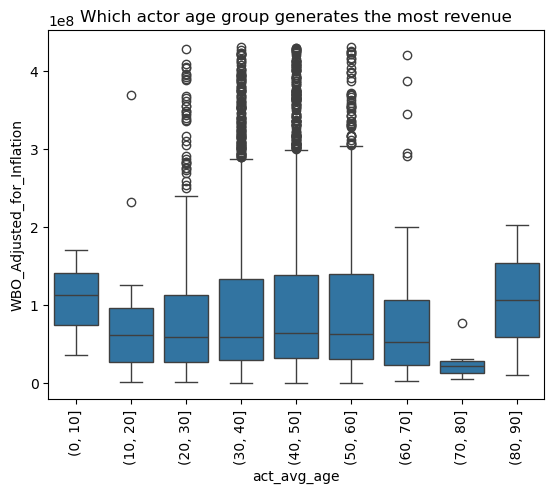

In [30]:
bins = [0,10,20,30,40,50,60,70,80,90]

sns.boxplot(x=pd.cut(crew_box_movie['act_avg_age'], bins=bins, right=True),y=crew_box_movie['WBO_Adjusted_for_Inflation'])
plt.xticks(rotation=90)
plt.title('Which actor age group generates the most revenue')
plt.show()